In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from Utils import *
from Data_handler import Data

In [25]:
# Prepare data
Data_instance = Data()               # create instance of the class Data()
data = Data_instance.get_data()      # store the data of Data_instance
data.sort_values(by=['permno','date'],inplace=True)

print(data.shape)

# Add excess returns columns
data['Rn_e'] = data['ret'] - data[RF_COL]
data['Rm_e'] = data['vwretd'] - data[RF_COL]

# Drop the NaN values
print('Initial shape of the data:', data.shape)
data = data.dropna().copy()
print('Final shape of the data:', data.shape)

Data has been loaded from local files. Only data with more than 36 observations has been kept.
(1439408, 10)
Initial shape of the data: (1439408, 12)
Final shape of the data: (1420791, 12)


In [27]:
# Rolling beta
print("Processing rolling betas")
data_betas = compute_rolling_betas(data)
print(data_betas)
print()

Processing rolling betas
BETAS SHAPE: (1131731, 3)
DATA BETAS SHAPE: (1420791, 13)
Final shape:  (403329, 13)
         permno       date       ret   shrout    prc  siccd       mcap  \
36        10001 2013-01-31  0.062701   8157.0   9.87   4925   80509.59   
37        10001 2013-02-28  0.011651   8157.0   9.94   4925   81080.58   
38        10001 2013-03-28  0.030684   8157.0  10.20   4925   83201.40   
44        10001 2013-09-30  0.004412  10372.0  10.20   4925  105794.40   
48        10001 2014-01-31  0.147572  10452.0   9.17   4925   95844.84   
...         ...        ...       ...      ...    ...    ...        ...   
1420778   93426 2022-12-30 -0.047326  12551.0  38.65   3676  485096.15   
1420780   93426 2023-02-28  0.009727  12551.0  43.60   3676  547223.60   
1420784   93426 2023-06-30  0.063860  12577.0  37.15   3676  467235.55   
1420786   93426 2023-08-31 -0.037156  12581.0  36.02   3676  453167.62   
1420789   93426 2023-11-30  0.019051  12510.0  30.49   3676  381429.90   

 

In [29]:
from Utils import bab_prepare_data

data_bab_prepared = bab_prepare_data(data_betas)
# display(data_bab_prepared)

EW = bab_equally_weighted_portfolios(data_bab_prepared)
VW = bab_value_weighted_portfolios(data_bab_prepared)

In [30]:
display(EW)
display(VW)

,ret,tmytm,decile,date
0,0.056276,0.003737,0,1967-02-28
1,0.037079,0.003737,1,1967-02-28
2,0.040213,0.003737,2,1967-02-28
3,0.035698,0.003737,3,1967-02-28
4,0.035058,0.003737,4,1967-02-28
...,...,...,...,...
2411,0.081268,0.004455,5,2023-11-30
2412,0.088788,0.004455,6,2023-11-30
2413,0.084623,0.004455,7,2023-11-30
2414,0.074016,0.004455,8,2023-11-30


,ret,tmytm,decile,date
0,0.025554,0.003737,0,1967-02-28
1,-0.000369,0.003737,1,1967-02-28
2,0.029992,0.003737,2,1967-02-28
3,0.017647,0.003737,3,1967-02-28
4,0.005286,0.003737,4,1967-02-28
...,...,...,...,...
2411,0.108460,0.004455,5,2023-11-30
2412,0.093270,0.004455,6,2023-11-30
2413,0.079242,0.004455,7,2023-11-30
2414,0.068202,0.004455,8,2023-11-30


Equally weighted returns per month, for each decile:
         ret     tmytm  decile       date
0   0.056276  0.003737       0 1967-02-28
1   0.037079  0.003737       1 1967-02-28
2   0.040213  0.003737       2 1967-02-28
3   0.035698  0.003737       3 1967-02-28
4   0.035058  0.003737       4 1967-02-28
5   0.035850  0.003737       5 1967-02-28
6   0.038629  0.003737       6 1967-02-28
7   0.029825  0.003737       7 1967-02-28
8   0.026974  0.003737       8 1967-02-28
9   0.140228  0.003089       0 1967-06-30
10  0.137829  0.003089       1 1967-06-30
11  0.090911  0.003089       2 1967-06-30
12  0.090771  0.003089       3 1967-06-30
13  0.081270  0.003089       4 1967-06-30
14  0.078484  0.003089       5 1967-06-30
(2416, 4)
Value weighted returns per month, for each decile:
         ret     tmytm  decile       date
0   0.025554  0.003737       0 1967-02-28
1  -0.000369  0.003737       1 1967-02-28
2   0.029992  0.003737       2 1967-02-28
3   0.017647  0.003737       3 1967-02-28
4   

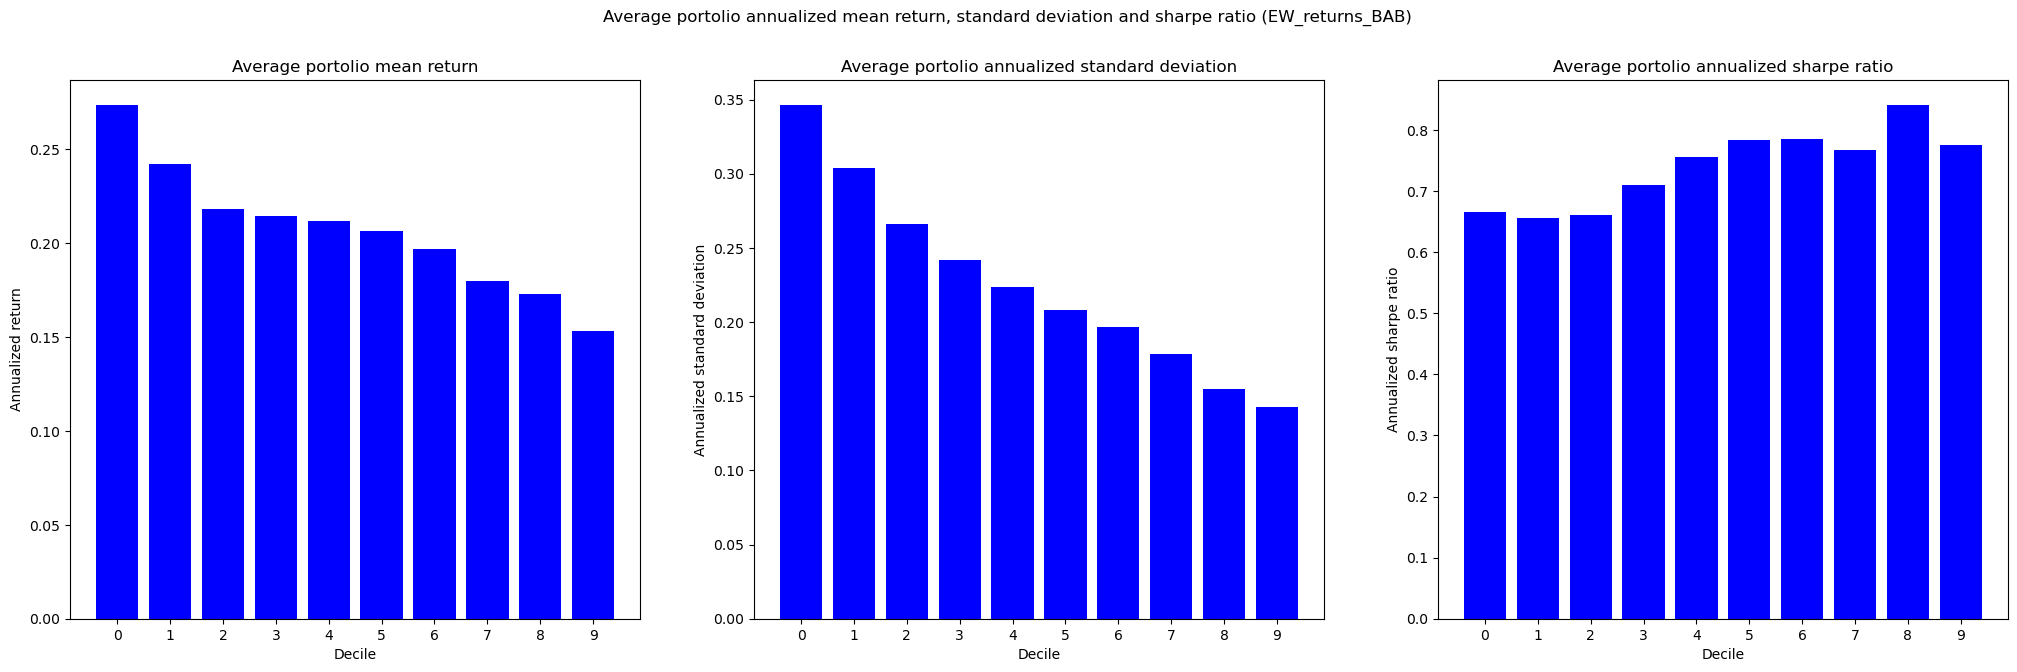

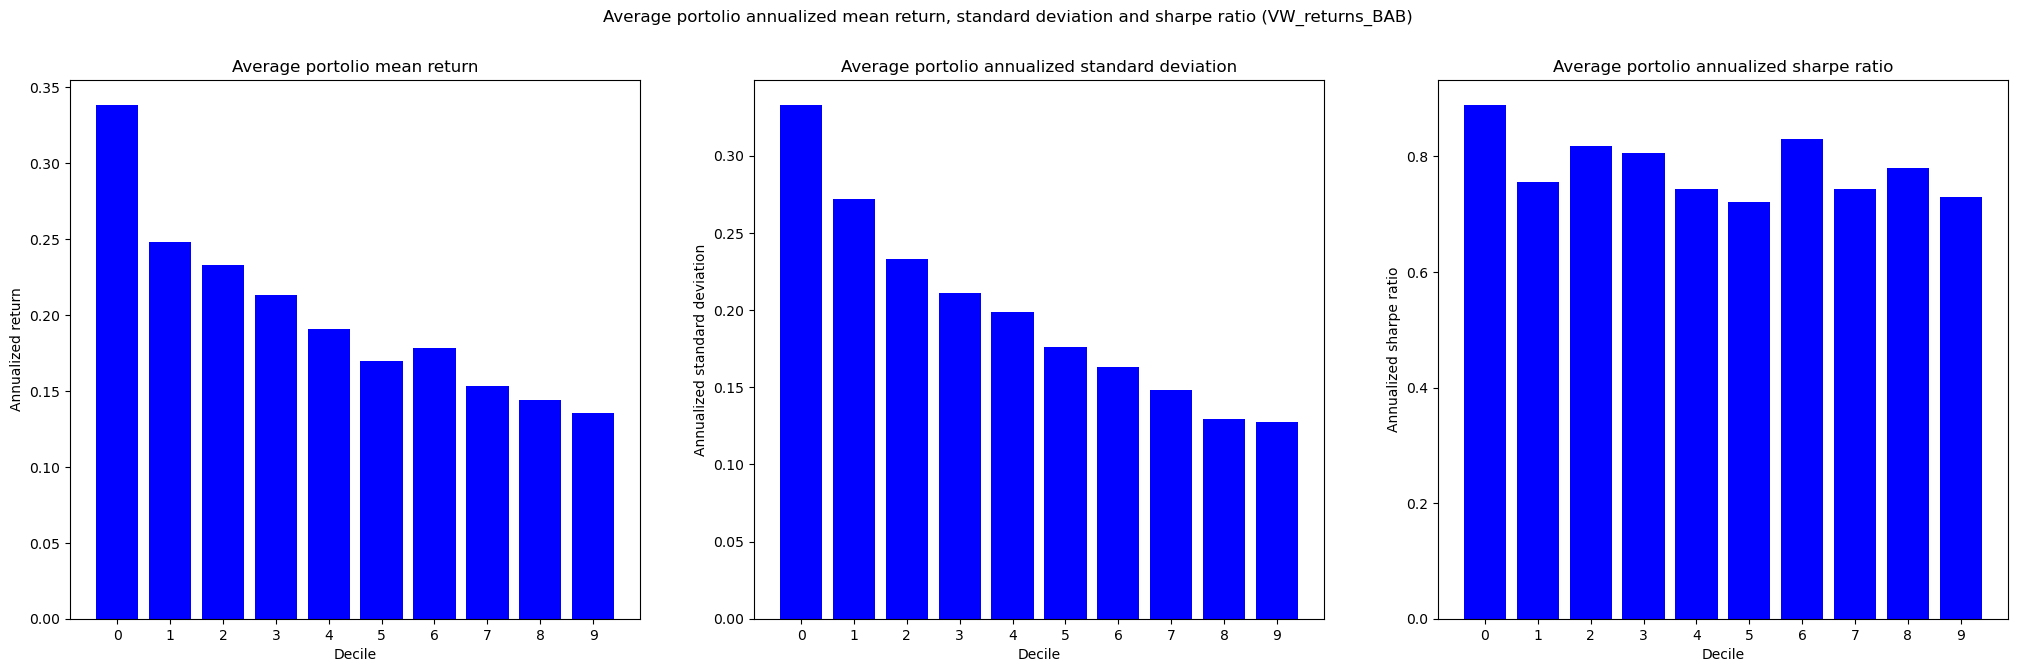

In [32]:
bab_question_b(data_bab_prepared, verbose=True)

In [36]:
from Utils import *

In [37]:
Question_c = bab_question_cd(data_bab_prepared)
display(Question_c)
print(Question_c.shape)

,date,rH_e,rL_e,bH,bL,Rm_e,rBAB
0,1967-02-28,0.027008,0.044732,1.571689,0.479830,0.007208,0.076040
1,1967-06-30,0.038501,0.119292,1.719534,0.501746,0.023813,0.215364
2,1967-08-31,0.010056,0.000986,1.667025,0.496637,-0.009498,-0.004047
3,1967-11-30,0.000488,-0.002625,1.665222,0.500879,0.004411,-0.005534
4,1968-02-29,-0.040042,-0.077970,1.806432,0.515194,-0.037518,-0.129175
...,...,...,...,...,...,...,...
241,2022-12-30,-0.042119,-0.069399,1.690825,0.551150,-0.060446,-0.101007
242,2023-02-28,-0.022995,-0.035494,1.684411,0.547167,-0.028348,-0.051217
243,2023-06-30,0.053043,0.120641,1.683091,0.546913,0.061881,0.189069
244,2023-08-31,-0.033604,-0.062364,1.682505,0.544641,-0.025068,-0.094532


(246, 7)


In [22]:
from Utils import bab_get_portfolio_weights

d = bab_get_portfolio_weights(data_bab_prepared)

display(d)

,date,rH_e,rL_e,bH,bL,Rm_e,rBAB
0,1964-04-30,0.004523,-0.010561,1.673399,0.503318,0.001810,-0.023686
1,1964-08-31,0.003210,-0.018554,1.665031,0.500706,-0.013986,-0.038984
2,1964-09-30,0.023951,0.046936,1.665561,0.499421,0.027544,0.079601
3,1964-10-30,0.009668,0.018809,1.655668,0.499689,0.006013,0.031801
4,1964-11-30,0.007705,-0.016417,1.635382,0.494132,0.000111,-0.037935
...,...,...,...,...,...,...,...
255,2022-12-30,-0.030086,-0.076605,1.895229,0.545874,-0.060446,-0.124459
256,2023-02-28,-0.016742,-0.031250,1.901693,0.541160,-0.028348,-0.048943
257,2023-06-30,0.050275,0.117028,1.843109,0.540851,0.061881,0.189101
258,2023-08-31,-0.029866,-0.053269,1.879004,0.547219,-0.025068,-0.081450


In [38]:
from BaB import *

In [39]:
display(bab_question_cd(data_bab_prepared))

,date,rH_e,rL_e,bH,bL,Rm_e,rBAB
0,1967-02-28,0.027008,0.044732,1.571689,0.479830,0.007208,0.076040
1,1967-06-30,0.038501,0.119292,1.719534,0.501746,0.023813,0.215364
2,1967-08-31,0.010056,0.000986,1.667025,0.496637,-0.009498,-0.004047
3,1967-11-30,0.000488,-0.002625,1.665222,0.500879,0.004411,-0.005534
4,1968-02-29,-0.040042,-0.077970,1.806432,0.515194,-0.037518,-0.129175
...,...,...,...,...,...,...,...
241,2022-12-30,-0.042119,-0.069399,1.690825,0.551150,-0.060446,-0.101007
242,2023-02-28,-0.022995,-0.035494,1.684411,0.547167,-0.028348,-0.051217
243,2023-06-30,0.053043,0.120641,1.683091,0.546913,0.061881,0.189069
244,2023-08-31,-0.033604,-0.062364,1.682505,0.544641,-0.025068,-0.094532


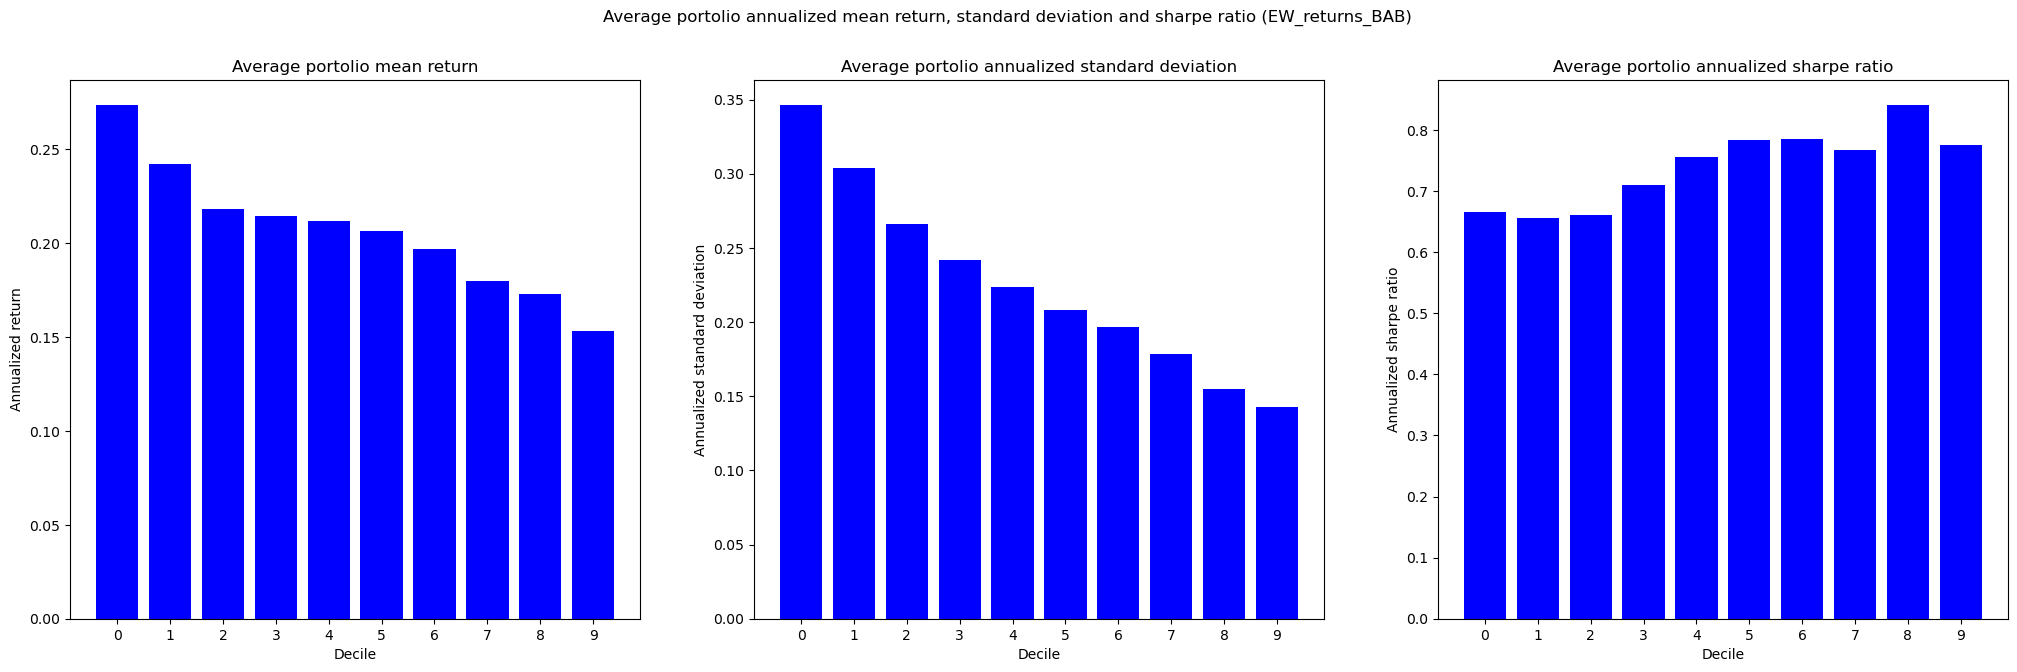

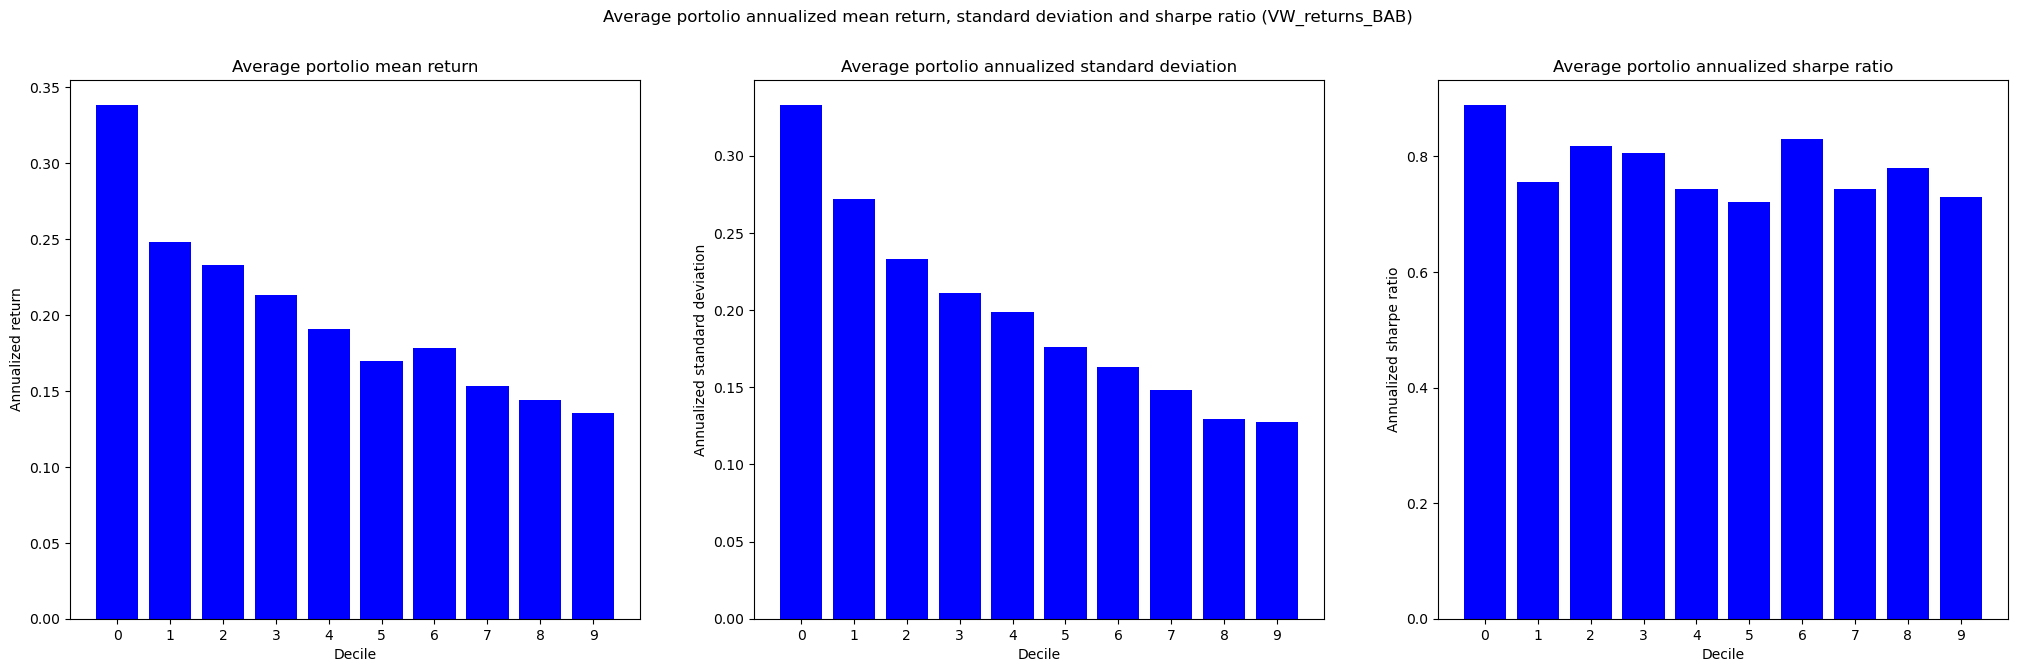


-----------------------
Betting-against-beta strategy
 - Mean return: 0.29
 - Standard deviation: 0.45
 - Sharpe ratio: 0.54
 - CAPM alpha: 0.12
These are the returns:
('BAB_qb_EW_returns',            ret     tmytm  decile       date
0     0.056276  0.003737       0 1967-02-28
1     0.037079  0.003737       1 1967-02-28
2     0.040213  0.003737       2 1967-02-28
3     0.035698  0.003737       3 1967-02-28
4     0.035058  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.081268  0.004455       5 2023-11-30
2412  0.088788  0.004455       6 2023-11-30
2413  0.084623  0.004455       7 2023-11-30
2414  0.074016  0.004455       8 2023-11-30
2415  0.024258  0.004455       9 2023-11-30

[2416 rows x 4 columns])
('BAB_qb_VW_returns',            ret     tmytm  decile       date
0     0.025554  0.003737       0 1967-02-28
1    -0.000369  0.003737       1 1967-02-28
2     0.029992  0.003737       2 1967-02-28
3     0.017647  0.003737       3 1967-02-28
4     0.00528

In [58]:
from BaB import run_bab_part3

returns = run_bab_part3(data, verbose = False)
print("These are the returns:")
for elem in returns.items():
    print(elem)

In [51]:
print(returns)

{'BAB_qb_EW_returns':            ret     tmytm  decile       date
0     0.056276  0.003737       0 1967-02-28
1     0.037079  0.003737       1 1967-02-28
2     0.040213  0.003737       2 1967-02-28
3     0.035698  0.003737       3 1967-02-28
4     0.035058  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.081268  0.004455       5 2023-11-30
2412  0.088788  0.004455       6 2023-11-30
2413  0.084623  0.004455       7 2023-11-30
2414  0.074016  0.004455       8 2023-11-30
2415  0.024258  0.004455       9 2023-11-30

[2416 rows x 4 columns], 'BAB_qb_VW_returns':            ret     tmytm  decile       date
0     0.025554  0.003737       0 1967-02-28
1    -0.000369  0.003737       1 1967-02-28
2     0.029992  0.003737       2 1967-02-28
3     0.017647  0.003737       3 1967-02-28
4     0.005286  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.108460  0.004455       5 2023-11-30
2412  0.093270  0.004455       6 2023-11-30
2413  0

In [52]:
data

,permno,date,ret,shrout,prc,siccd,mcap,mcap_l,tmytm,vwretd,Rn_e,Rm_e
6,10001,2009-12-31,0.162621,4361.0,10.3000,4925,44918.3000,43871.6600,0.000032,0.028475,0.162589,0.028443
5,10001,2010-01-29,-0.018932,4361.0,10.0600,4925,43871.6600,43646.6324,0.000013,-0.037172,-0.018945,-0.037185
4,10001,2010-02-26,-0.000656,4361.0,10.0084,4925,43646.6324,44351.3700,0.000061,0.034744,-0.000717,0.034683
3,10001,2010-03-31,0.020643,4361.0,10.1700,4925,44351.3700,69137.3000,0.000112,0.063668,0.020531,0.063556
2,10001,2010-04-30,0.124385,6070.0,11.3900,4925,69137.3000,69209.4000,0.000118,0.020036,0.124267,0.019918
...,...,...,...,...,...,...,...,...,...,...,...,...
1439272,93426,2023-08-31,-0.037156,12581.0,36.0200,3676,453167.6200,422469.9800,0.004463,-0.020605,-0.041619,-0.025068
1439271,93426,2023-09-29,-0.067740,12581.0,33.5800,3676,422469.9800,376423.5200,0.004472,-0.047390,-0.072212,-0.051862
1439270,93426,2023-10-31,-0.108993,12581.0,29.9200,3676,376423.5200,381429.9000,0.004475,-0.028867,-0.113468,-0.033342
1439269,93426,2023-11-30,0.019051,12510.0,30.4900,3676,381429.9000,426215.7000,0.004455,0.092057,0.014596,0.087602


In [59]:
from Momentum import *

mom = mom_prepare_data(data)

display(mom)

,permno,date,ret,shrout,prc,siccd,mcap,mcap_l,tmytm,vwretd,Rn_e,Rm_e,roll_ret,decile,VW_weight,VW_ret_contrib
6,10001,2009-12-31,0.162621,4361.0,10.3000,4925,44918.3000,43871.6600,0.000032,0.028475,0.162589,0.028443,NaN,NaN,NaN,NaN
5,10001,2010-01-29,-0.018932,4361.0,10.0600,4925,43871.6600,43646.6324,0.000013,-0.037172,-0.018945,-0.037185,NaN,NaN,NaN,NaN
4,10001,2010-02-26,-0.000656,4361.0,10.0084,4925,43646.6324,44351.3700,0.000061,0.034744,-0.000717,0.034683,NaN,NaN,NaN,NaN
3,10001,2010-03-31,0.020643,4361.0,10.1700,4925,44351.3700,69137.3000,0.000112,0.063668,0.020531,0.063556,NaN,NaN,NaN,NaN
2,10001,2010-04-30,0.124385,6070.0,11.3900,4925,69137.3000,69209.4000,0.000118,0.020036,0.124267,0.019918,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439272,93426,2023-08-31,-0.037156,12581.0,36.0200,3676,453167.6200,422469.9800,0.004463,-0.020605,-0.041619,-0.025068,0.142511,5.0,0.000111,-0.000004
1439271,93426,2023-09-29,-0.067740,12581.0,33.5800,3676,422469.9800,376423.5200,0.004472,-0.047390,-0.072212,-0.051862,0.242924,5.0,0.000121,-0.000008
1439270,93426,2023-10-31,-0.108993,12581.0,29.9200,3676,376423.5200,381429.9000,0.004475,-0.028867,-0.113468,-0.033342,0.034596,4.0,0.000149,-0.000016
1439269,93426,2023-11-30,0.019051,12510.0,30.4900,3676,381429.9000,426215.7000,0.004455,0.092057,0.014596,0.087602,-0.276471,2.0,0.000199,0.000004


In [60]:
EW_ = mom_equally_weighted_portfolios(mom)
VW_ = mom_value_weighted_portfolios(mom)

display(EW_)
display(VW_)

,ret,tmytm,decile,date
0,-0.043278,0.002856,0.0,1964-12-31
1,-0.009028,0.002856,1.0,1964-12-31
2,-0.005590,0.002856,2.0,1964-12-31
3,0.000432,0.002856,3.0,1964-12-31
4,-0.002579,0.002856,4.0,1964-12-31
...,...,...,...,...
7075,0.080944,0.004484,5.0,2023-12-29
7076,0.080165,0.004484,6.0,2023-12-29
7077,0.085783,0.004484,7.0,2023-12-29
7078,0.106752,0.004484,8.0,2023-12-29


,ret,tmytm,decile,date
0,-0.004562,0.002856,0.0,1964-12-31
1,0.000245,0.002856,1.0,1964-12-31
2,0.015507,0.002856,2.0,1964-12-31
3,0.013461,0.002856,3.0,1964-12-31
4,-0.004111,0.002856,4.0,1964-12-31
...,...,...,...,...
7075,0.060809,0.004484,5.0,2023-12-29
7076,0.046505,0.004484,6.0,2023-12-29
7077,0.039448,0.004484,7.0,2023-12-29
7078,0.087149,0.004484,8.0,2023-12-29


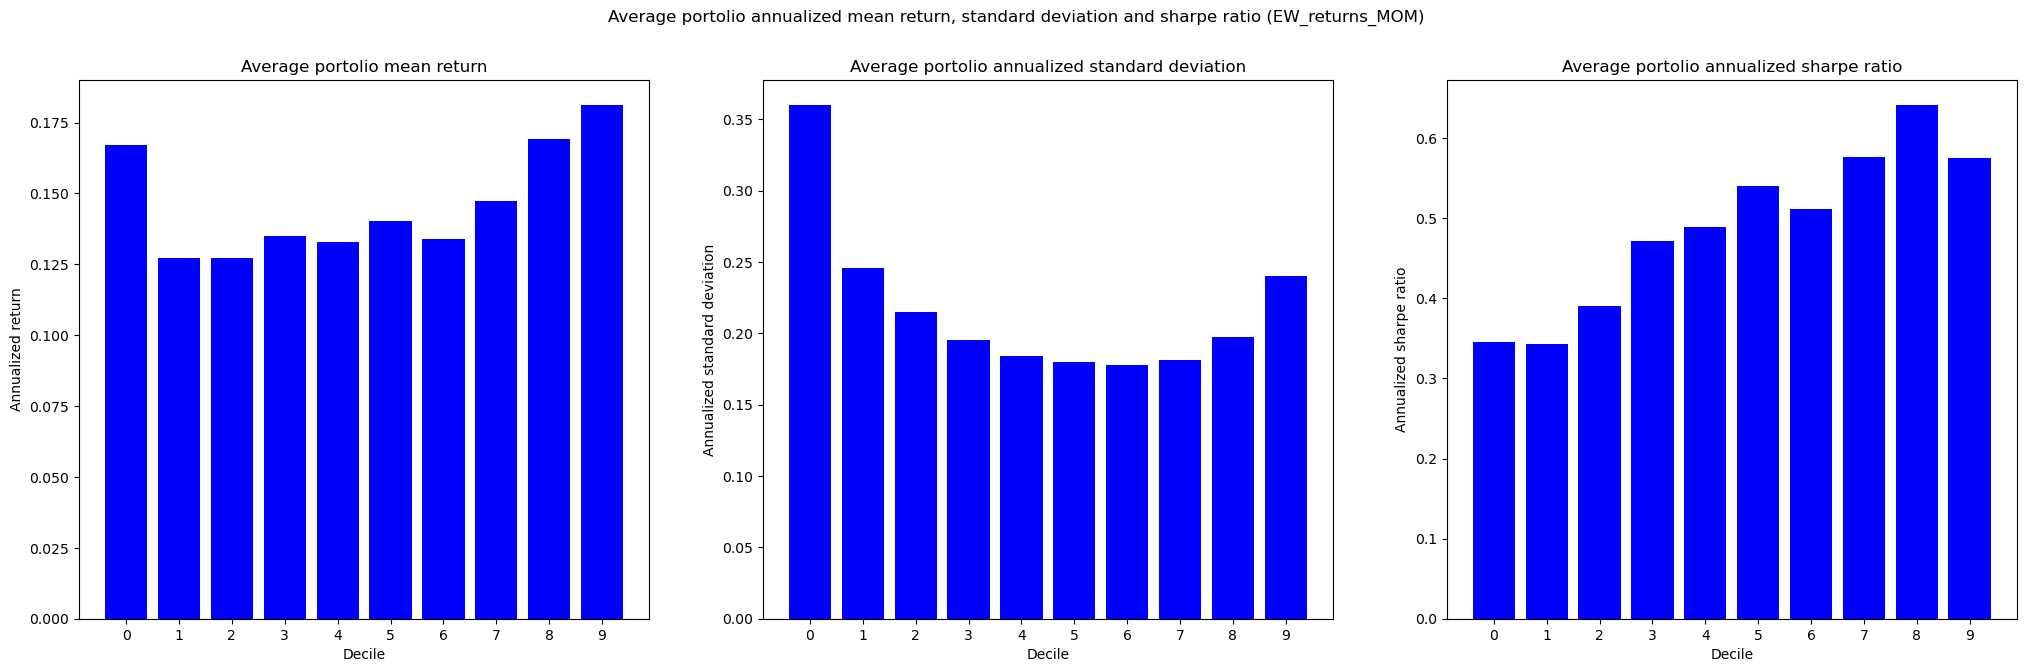

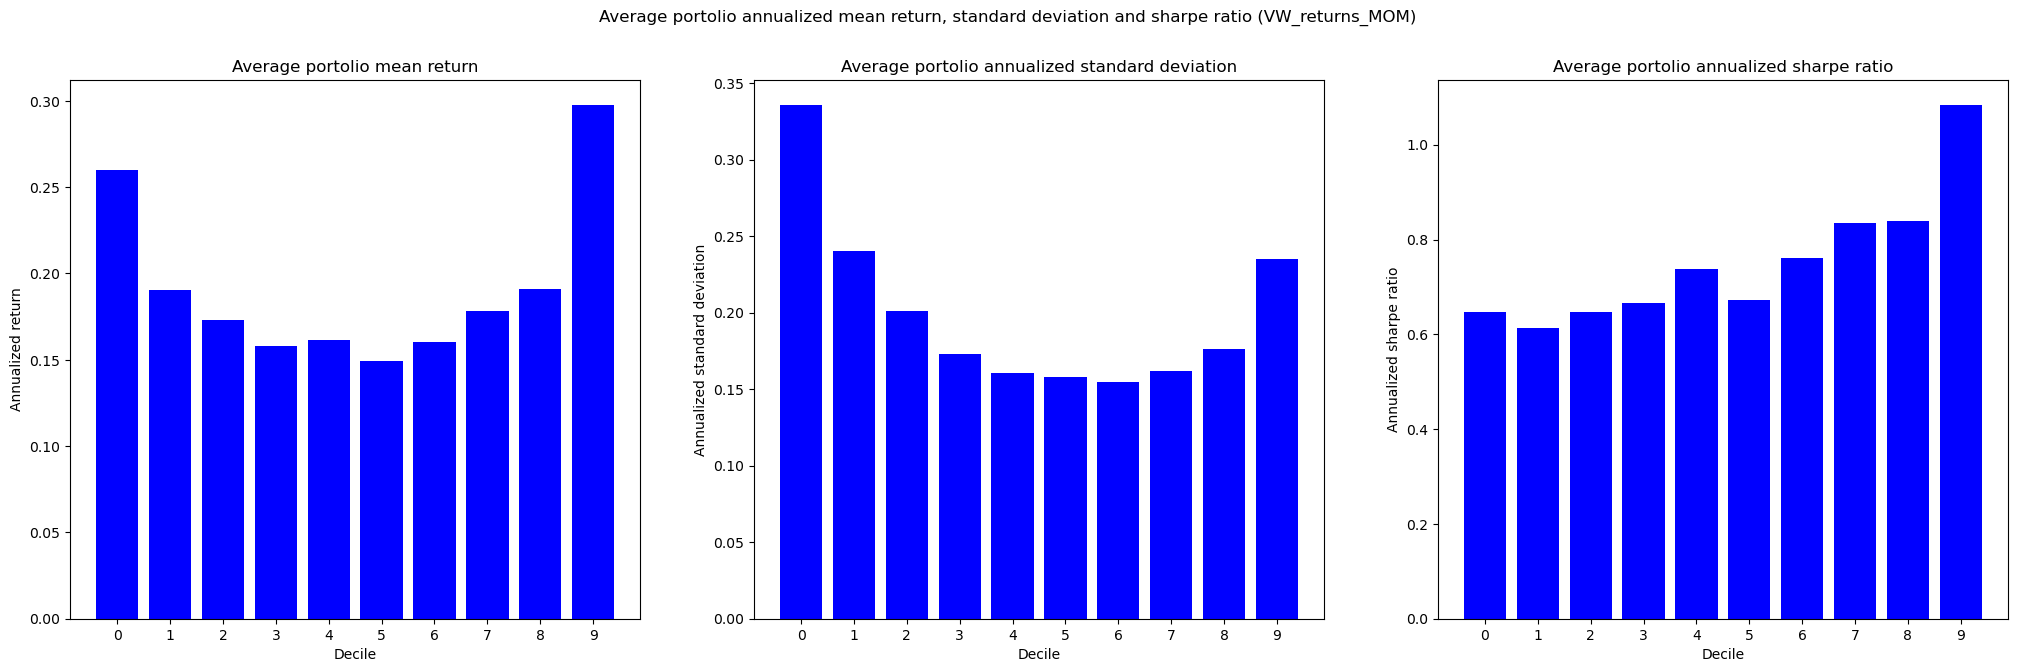

In [65]:
from Momentum import *
EW_mom, VW_mom = mom_question_a(mom, verbose=False)

In [83]:
from Momentum import *
leg = mom_add_legs(mom)
piv = mom_ew_from_legs(leg)
display(piv)

leg,EW_return,tmytm
date,,
1964-12-31,-0.002042,0.002856
1965-01-29,-0.033552,0.003237
1965-02-26,0.005706,0.003208
1965-03-31,-0.006008,0.003156
1965-04-30,0.019768,0.003216
...,...,...
2023-08-31,0.028917,0.004463
2023-09-29,0.025809,0.004472
2023-10-31,0.012146,0.004475


------------------------
Question a


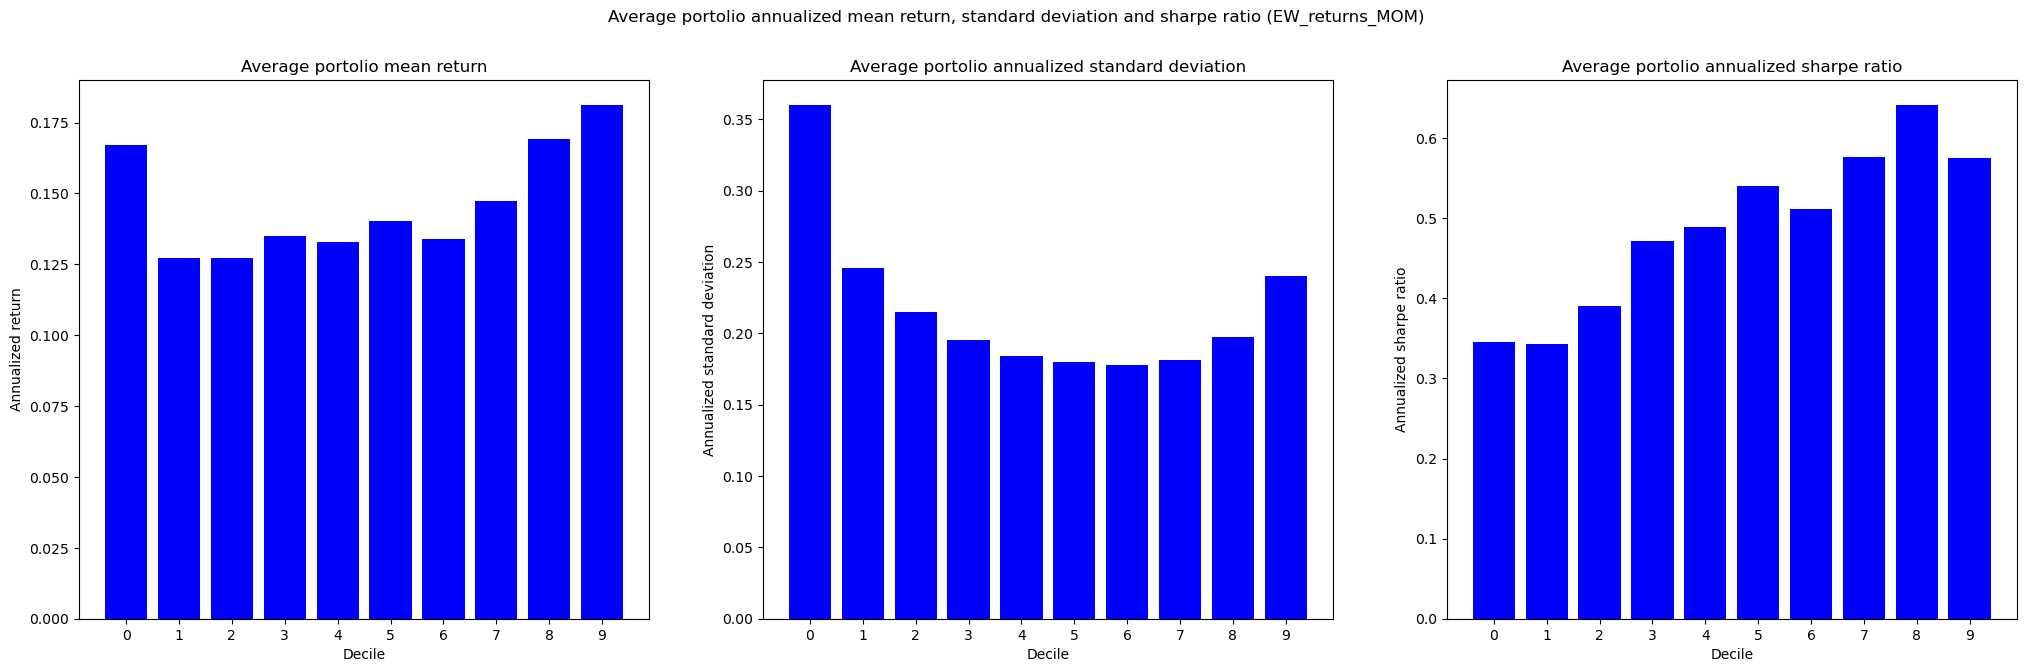

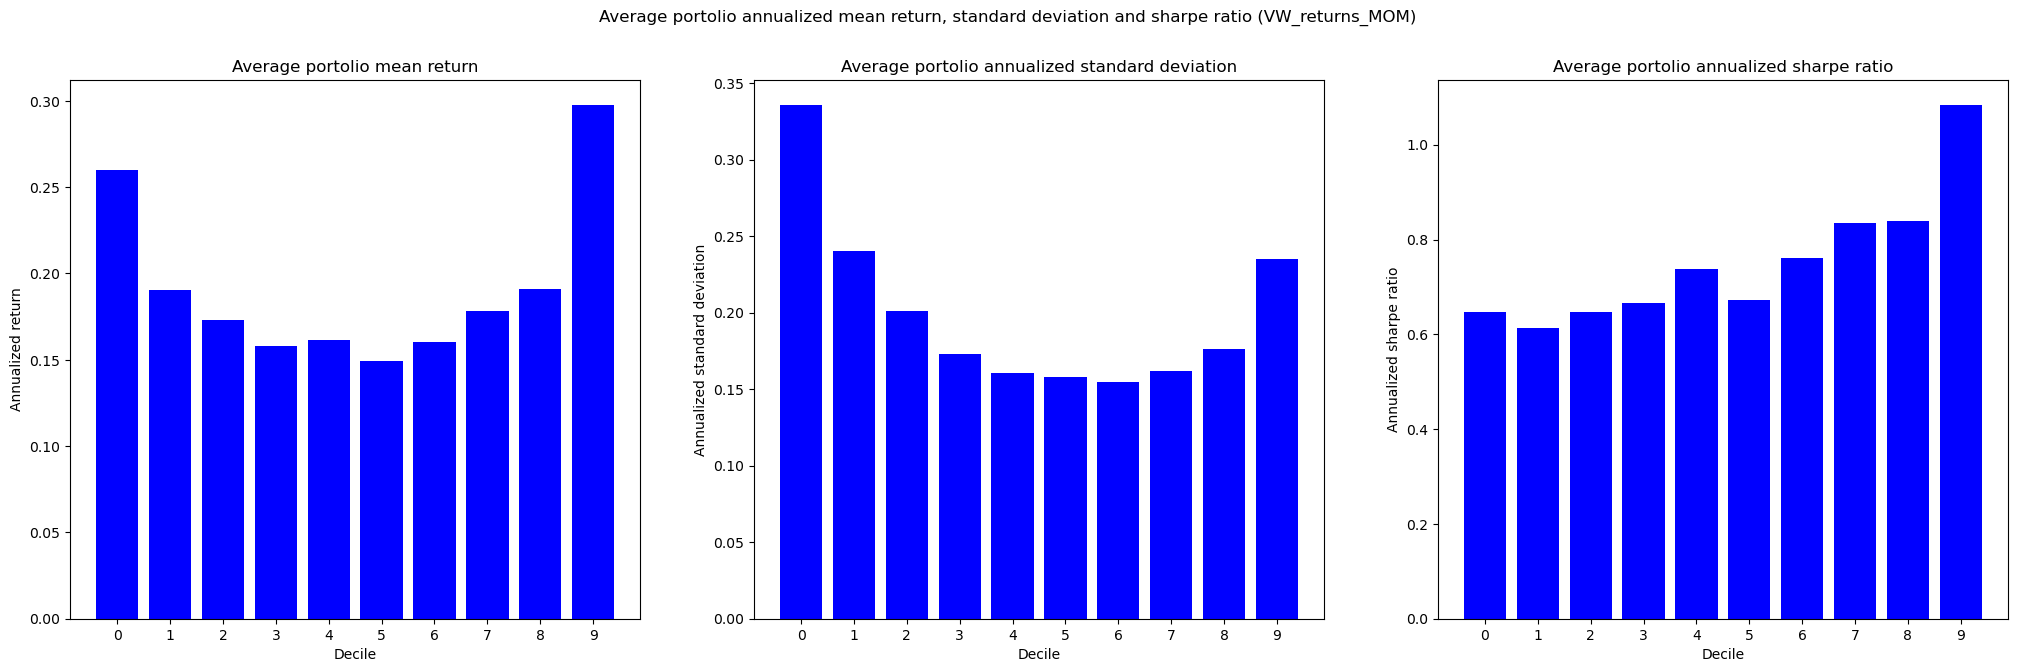

------------------------
Question b
Momentum strategy based on equally weighted portfolios
 - Expected return:	 0.03%
 - Standard deviation:	 0.17%
 - Sharpe ratio:	 -0.11
Momentum strategy based on value weighted portfolios
 - Expected return:	 0.01%
 - Standard deviation:	 0.18%
 - Sharpe ratio:	 -0.18


In [85]:
from Momentum import *
# display(leg)
w = run_mom_part4(data, verbose=False)

------------------------
Question a
------------------------
Question b


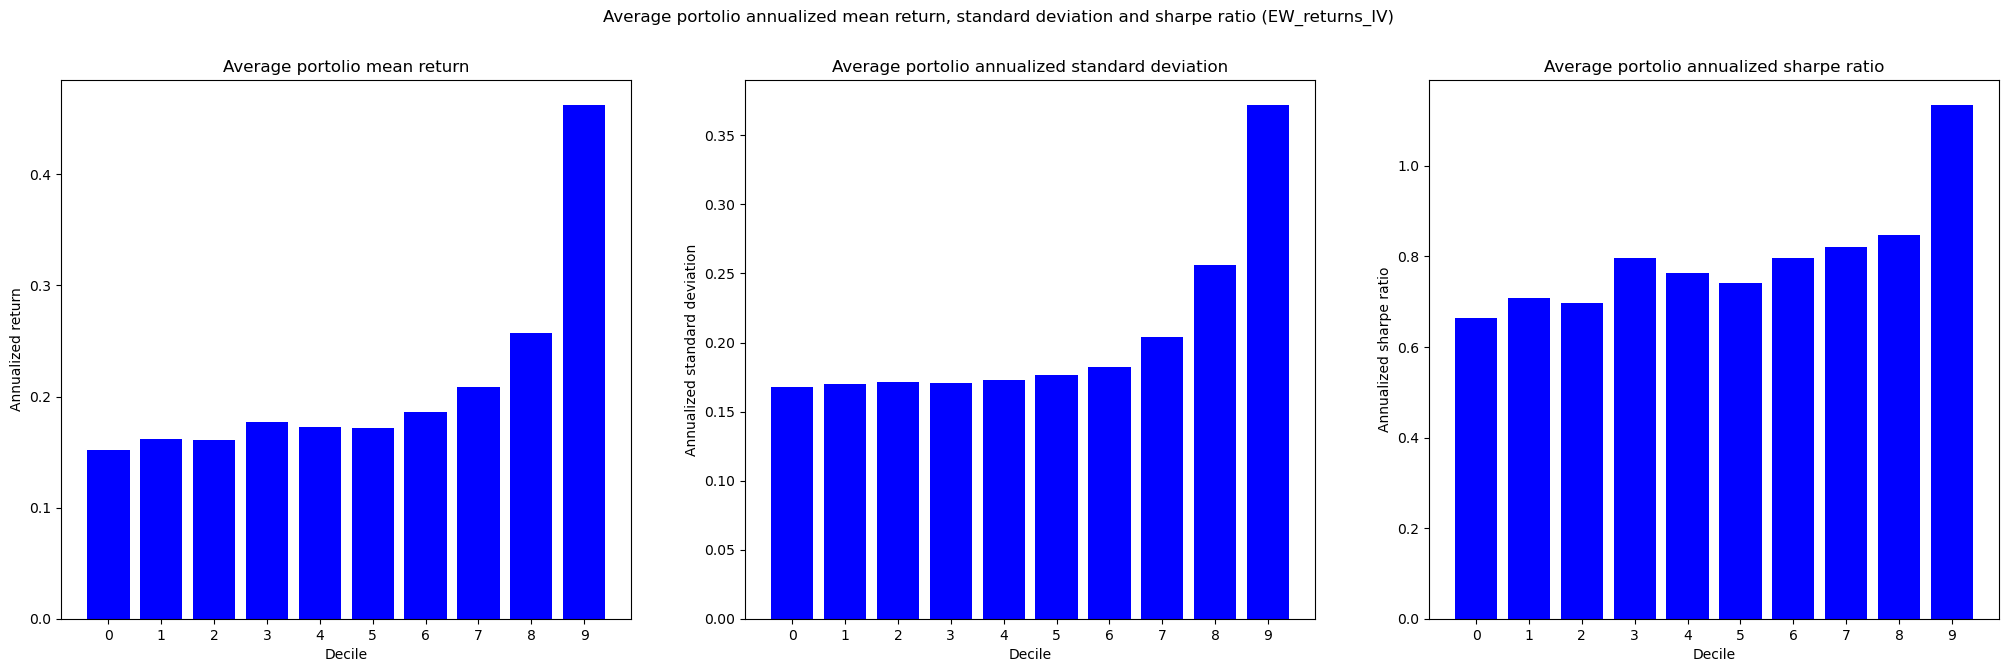

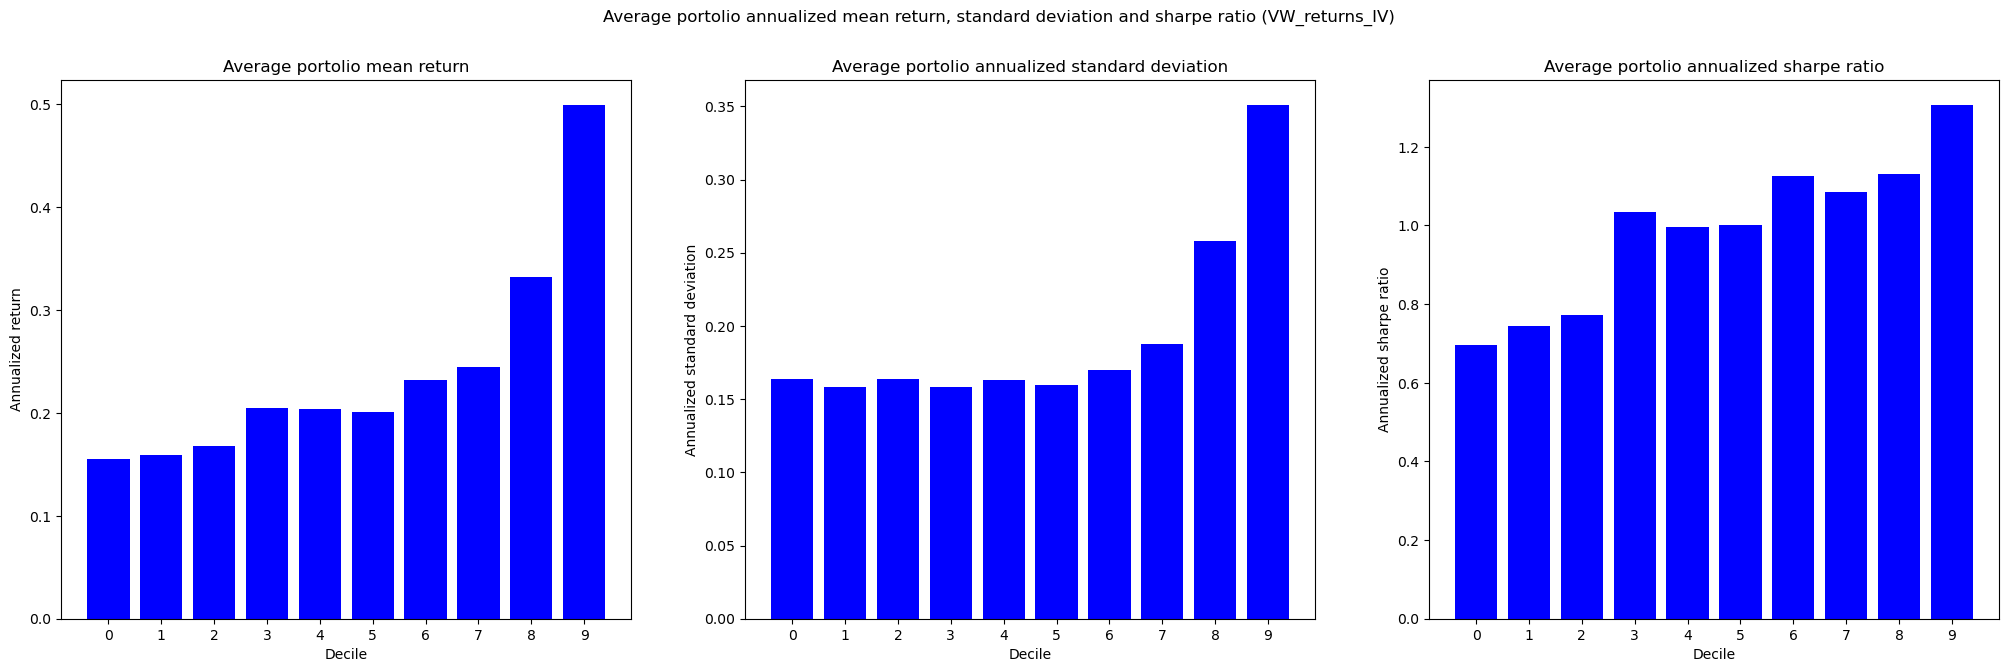

C'est bo


,permno,date,ret,shrout,prc,siccd,mcap,mcap_l,tmytm,vwretd,Rn_e,Rm_e,beta,IV,decile,VW_weight,VW_ret_contrib
229,10006,1975-06-30,-0.049862,5700.0,42.875,3743,244387.500,245812.500,0.004709,0.051473,-0.054571,0.046764,0.910098,0.066404,1,0.002784,-0.000139
239,10006,1976-04-30,0.012658,5783.0,50.000,3743,289150.000,280475.500,0.003911,-0.010402,0.008747,-0.014313,0.878247,0.065667,1,0.002955,0.000037
242,10006,1976-07-30,-0.052265,8675.0,34.000,3743,294950.000,291696.875,0.004235,-0.006136,-0.056500,-0.010371,0.888217,0.065080,1,0.003144,-0.000164
244,10006,1976-09-30,0.040892,8675.0,35.000,3743,303625.000,277600.000,0.004235,0.024513,0.036657,0.020278,0.918600,0.064368,1,0.002959,0.000121
248,10006,1977-01-31,0.014235,8675.0,35.625,3743,309046.875,298203.125,0.003793,-0.036326,0.010442,-0.040119,0.894098,0.064130,1,0.002970,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439395,93426,2022-12-30,-0.047326,12551.0,38.650,3676,485096.150,541952.180,0.003326,-0.057120,-0.050652,-0.060446,0.758405,0.077758,2,0.000203,-0.000010
1439397,93426,2023-02-28,0.009727,12551.0,43.600,3676,547223.600,524296.800,0.003682,-0.024666,0.006045,-0.028348,0.761749,0.076821,2,0.000224,0.000002
1439401,93426,2023-06-30,0.063860,12577.0,37.150,3676,467235.550,470505.570,0.004302,0.066183,0.059558,0.061881,0.756221,0.075905,2,0.000183,0.000012
1439403,93426,2023-08-31,-0.037156,12581.0,36.020,3676,453167.620,422469.980,0.004463,-0.020605,-0.041619,-0.025068,0.761621,0.075256,2,0.000178,-0.000007


In [98]:
from Utils import compute_rolling_betas
from IV import *
data = Data_instance.get_data()
run_iv_part5(data, question_a=True, question_b=True, verbose=False)

------------------------
Question a
------------------------
Question b


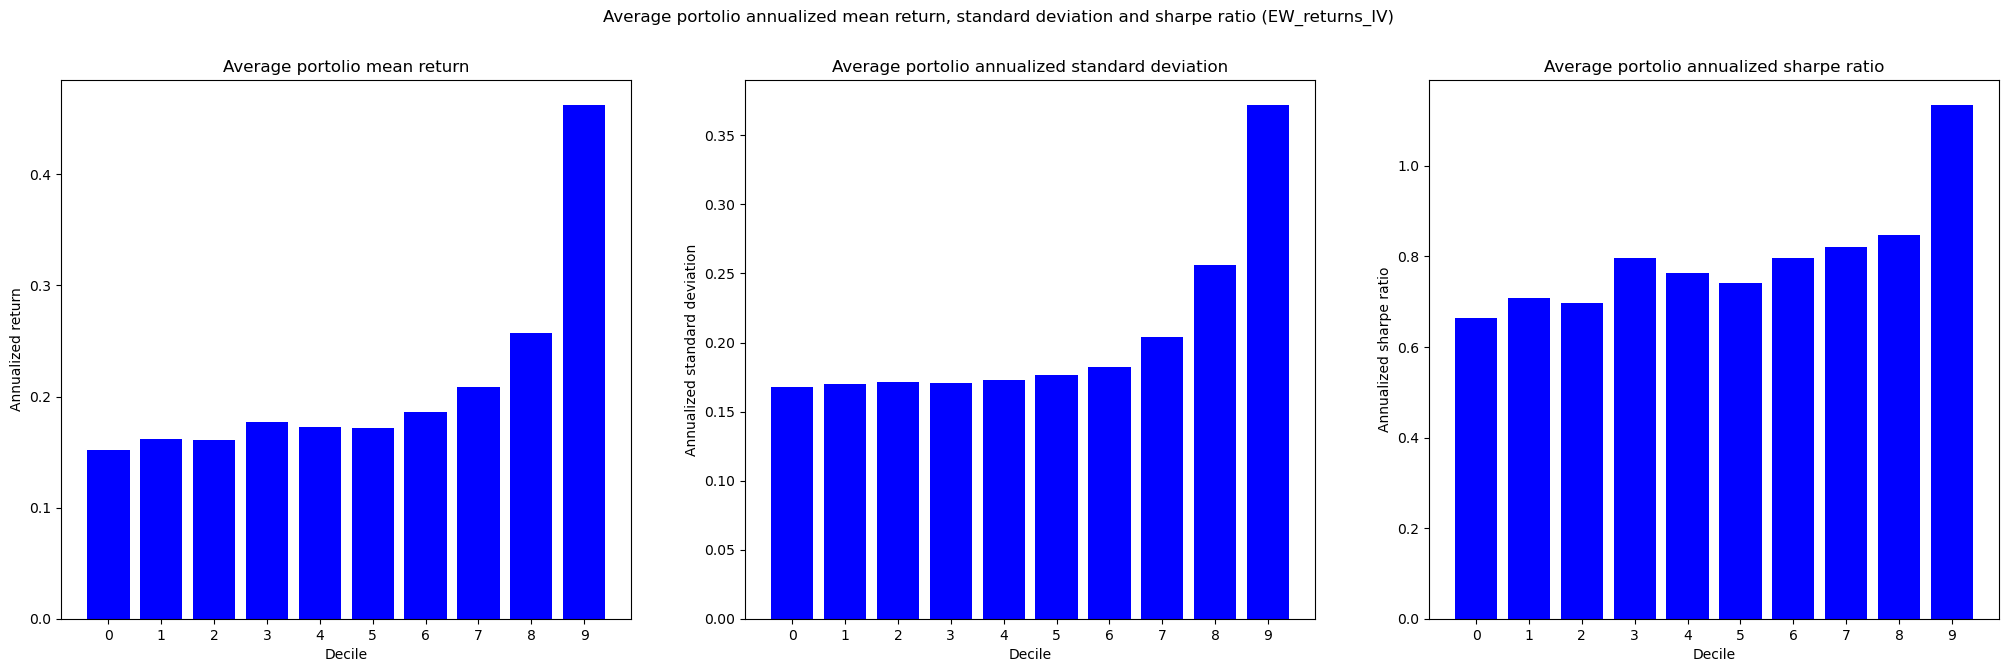

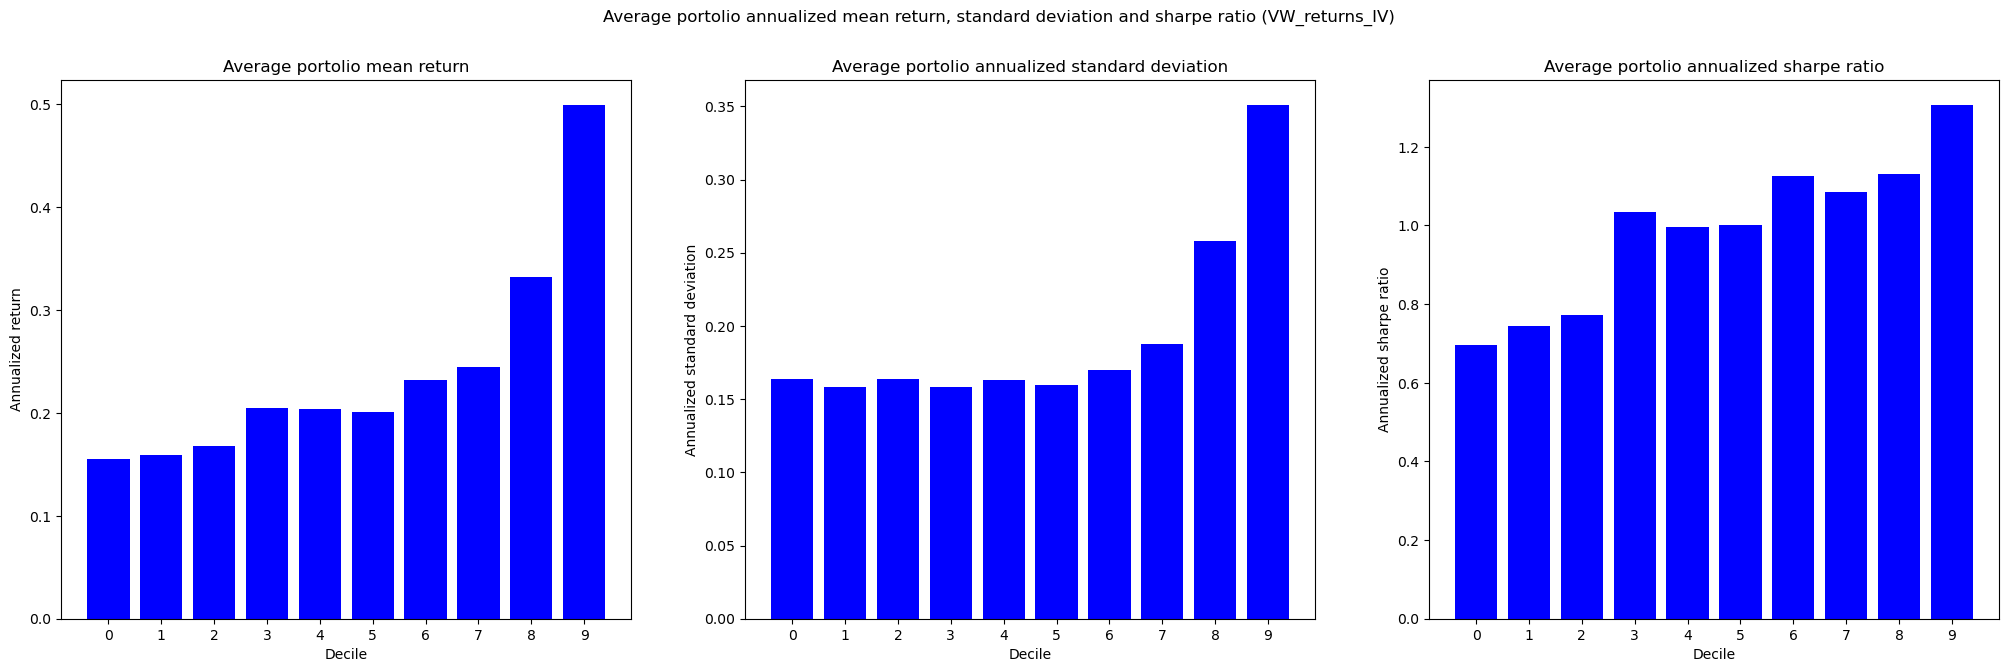

------------------------
Question c
IV strategy based on equally weighted portfolios
 - Expected return:	 0.14%
 - Standard deviation:	 0.16%
 - Sharpe ratio:	 0.64


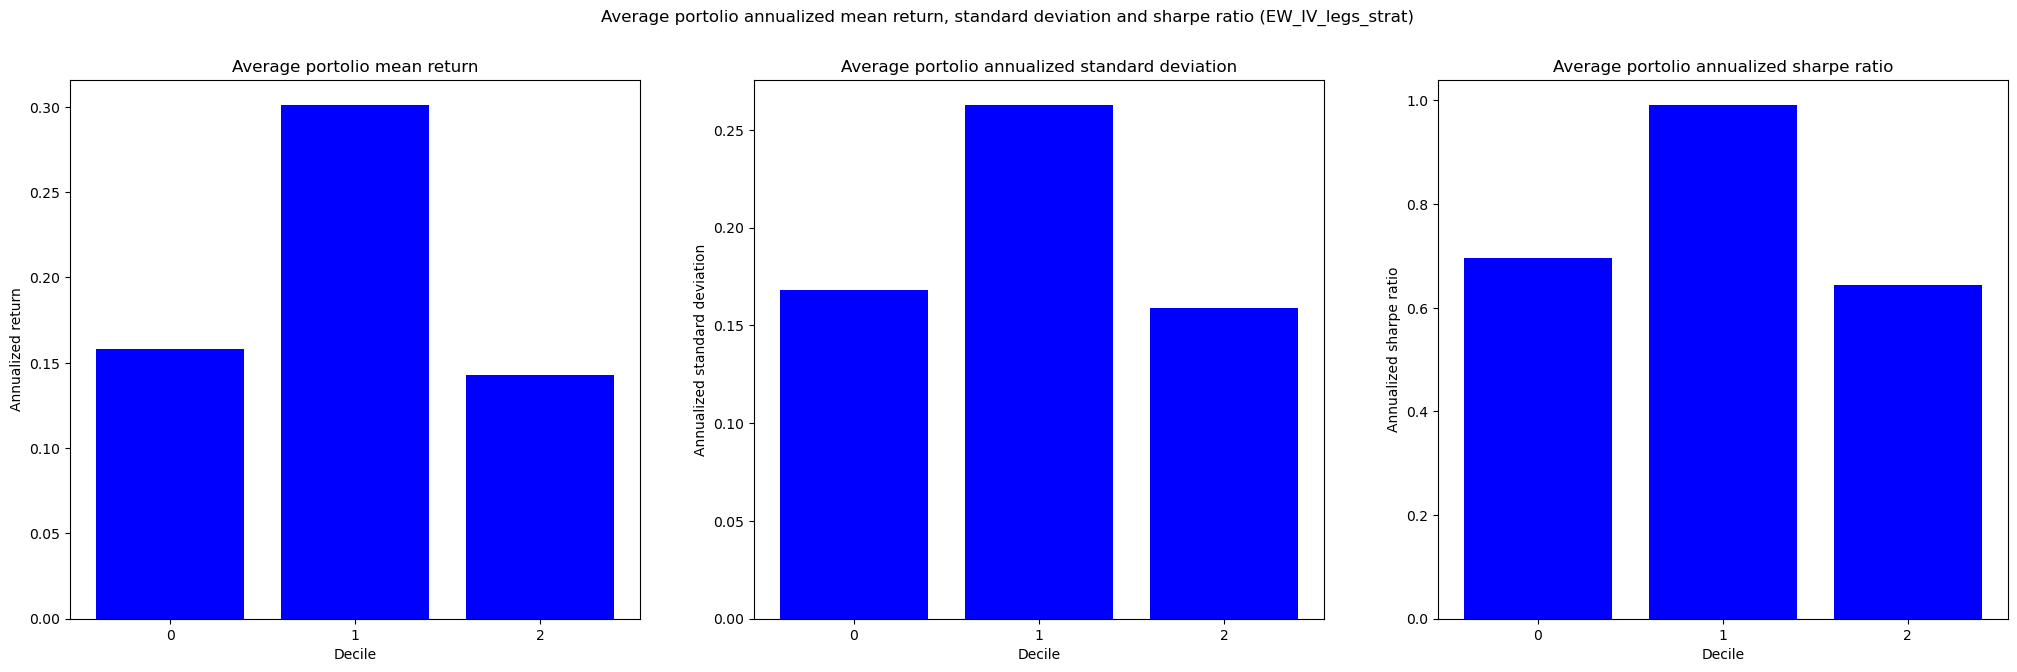

Bar 0: leg -1; Bar 1: leg 1; Bar 2: Strategy


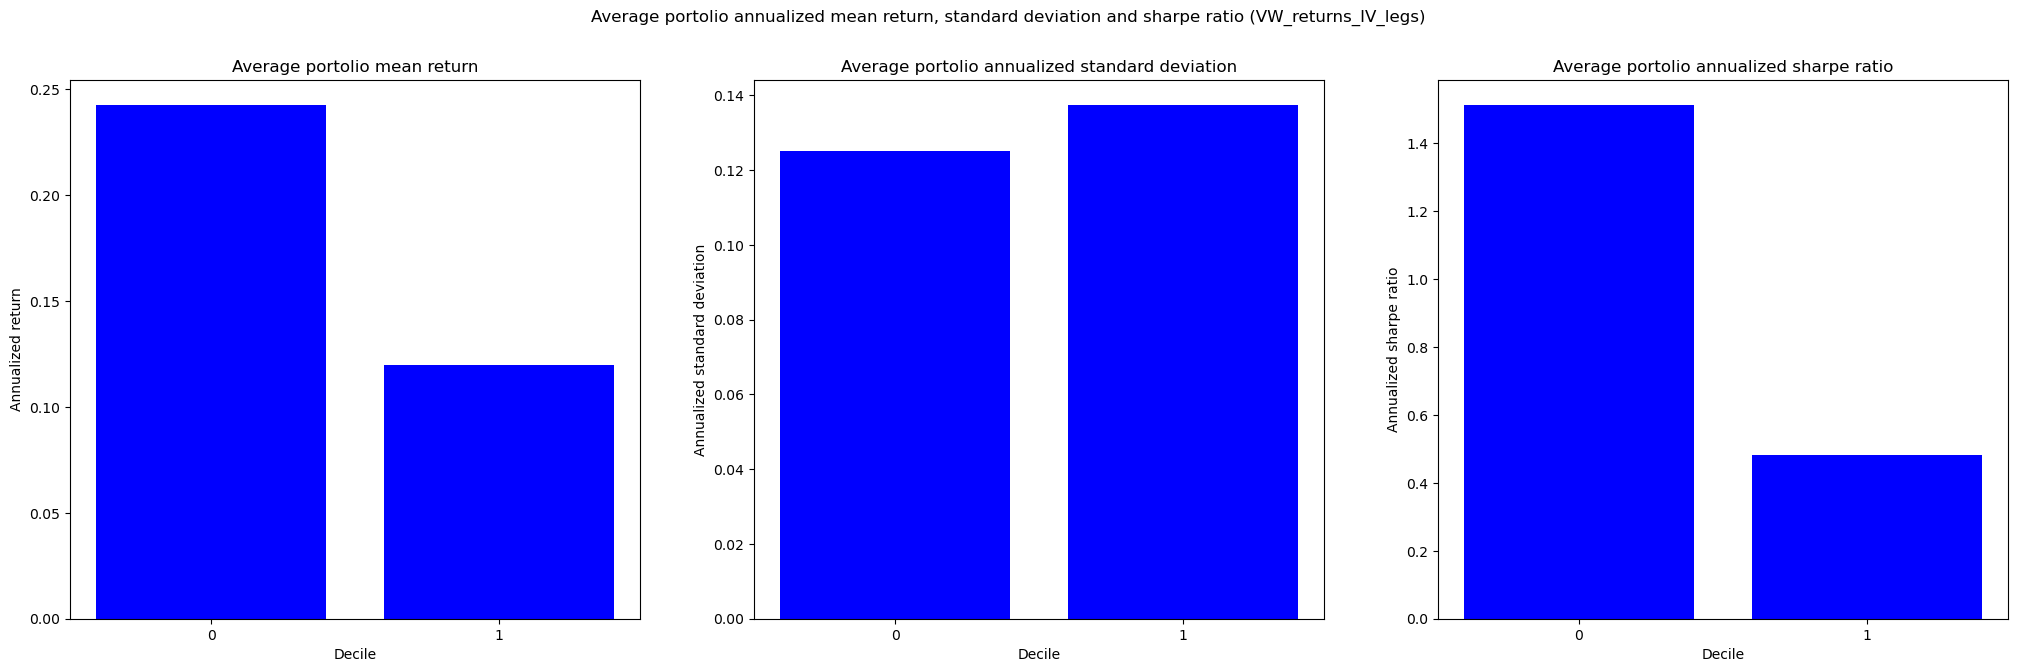

In the graph, leg '-1' corresponds to bar '0'; leg '1' is bar '1'.
IVVV
          date    VW_ret     tmytm  leg
0   1975-06-30  0.034858  0.004709 -1.0
1   1976-04-30 -0.019469  0.003911 -1.0
2   1976-07-30 -0.009926  0.004235 -1.0
3   1976-09-30 -0.003246  0.004235 -1.0
4   1977-01-31  0.065833  0.003793 -1.0
..         ...       ...       ...  ...
207 2022-12-30 -0.027695  0.003326  1.0
208 2023-02-28 -0.005732  0.003682  1.0
209 2023-06-30  0.032531  0.004302  1.0
210 2023-08-31  0.016797  0.004463  1.0
211 2023-11-30 -0.047713  0.004455  1.0

[212 rows x 4 columns]


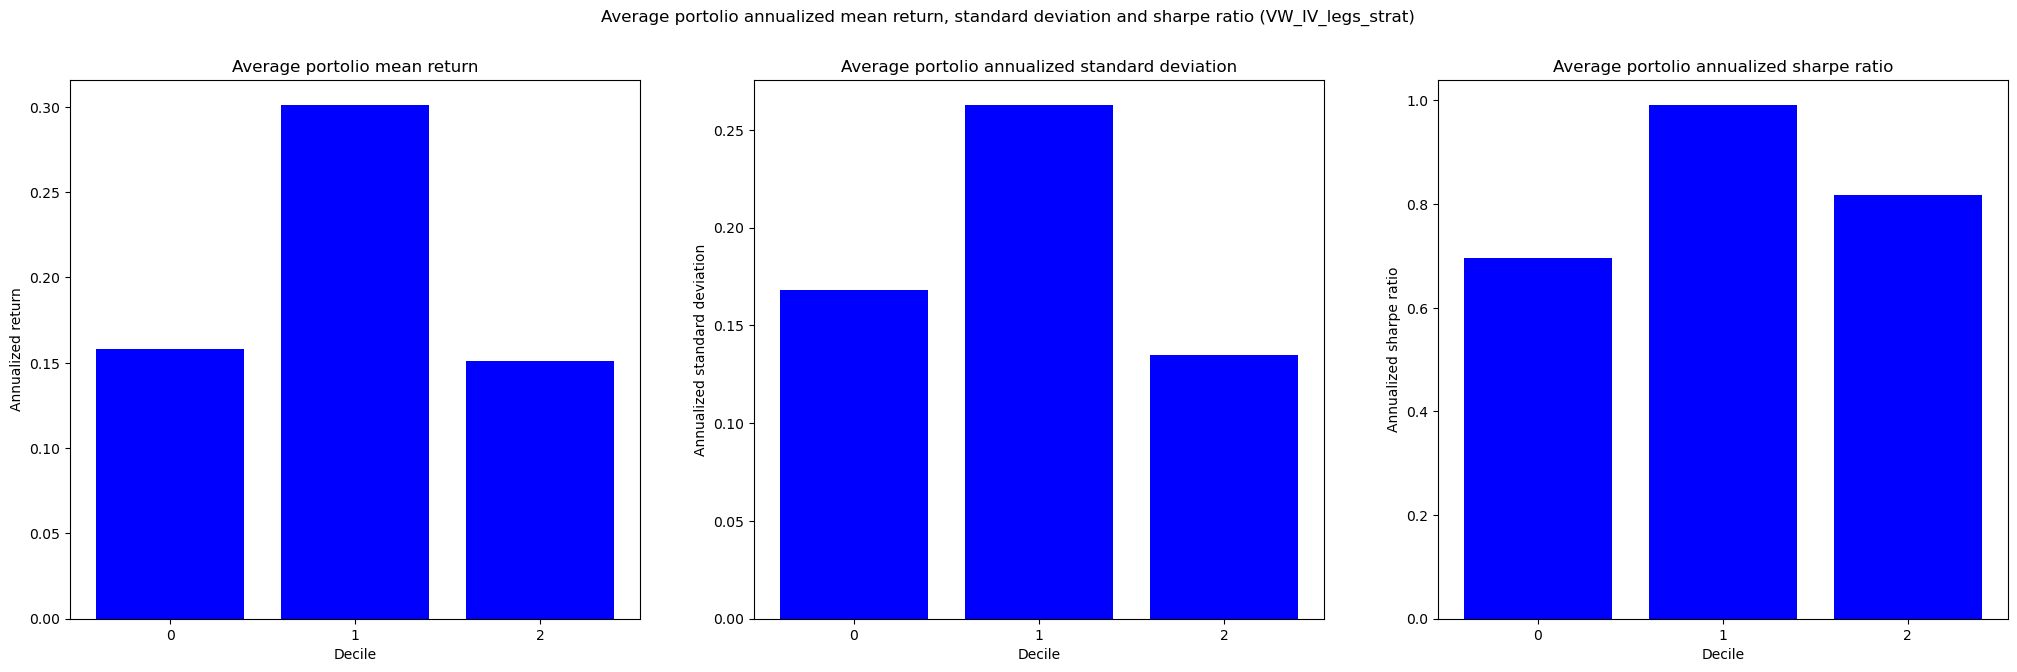

Bar 0: leg -1; Bar 1: leg 1; Bar 2: Strategy


In [108]:
from IV import run_iv_part5

returns_iv = run_iv_part5(data, question_a=True, question_b=True, verbose=False)

In [109]:
print(returns_iv.keys())

dict_keys(['IV_question_a', 'IV_question_b_EW_returns', 'IV_question_b_VW_returns', 'IV_question_c'])


In [111]:
print(returns_iv['IV_question_c'])
print(returns_iv['IV_question_c'].keys())

{'IV_question_c_EW_returns_data':           ret     tmytm  leg       date
0    0.064300  0.004709 -1.0 1975-06-30
1    0.097059  0.004709  1.0 1975-06-30
2   -0.003120  0.003911 -1.0 1976-04-30
3   -0.033523  0.003911  1.0 1976-04-30
4    0.000746  0.004235 -1.0 1976-07-30
..        ...       ...  ...        ...
419  0.105876  0.004302  1.0 2023-06-30
420 -0.027048  0.004463 -1.0 2023-08-31
421 -0.022095  0.004463  1.0 2023-08-31
422  0.091416  0.004455 -1.0 2023-11-30
423  0.033790  0.004455  1.0 2023-11-30

[424 rows x 4 columns], 'IV_question_c_EW_long_short_data': leg         EW_return     tmytm
date                           
1975-06-30   0.032759  0.004709
1976-04-30  -0.030403  0.003911
1976-07-30  -0.009156  0.004235
1976-09-30  -0.008487  0.004235
1977-01-31   0.104486  0.003793
...               ...       ...
2022-12-30  -0.037555  0.003326
2023-02-28   0.005241  0.003682
2023-06-30   0.021579  0.004302
2023-08-31   0.004952  0.004463
2023-11-30  -0.057625  0.004455

[212 row

In [115]:
display(returns_iv['IV_question_c']['IV_question_c_VW_long_short_data'])

data.rename(columns={'ret':'rBAB'}, inplace=True)

,date,tmytm,ret
0,1975-06-30,0.004709,0.034858
1,1976-04-30,0.003911,-0.019469
2,1976-07-30,0.004235,-0.009926
3,1976-09-30,0.004235,-0.003246
4,1977-01-31,0.003793,0.065833
...,...,...,...
207,2022-12-30,0.003326,-0.027695
208,2023-02-28,0.003682,-0.005732
209,2023-06-30,0.004302,0.032531
210,2023-08-31,0.004463,0.016797


In [178]:
from main import main

return_all = main()

Data has been loaded from local files. Only data with more than 36 observations has been kept.
------------------------ Running BaB ------------------------
BAB Equally weighted returns per month, for each decile:
         ret     tmytm  decile       date
0   0.056276  0.003737       0 1967-02-28
1   0.037079  0.003737       1 1967-02-28
2   0.040213  0.003737       2 1967-02-28
3   0.035698  0.003737       3 1967-02-28
4   0.035058  0.003737       4 1967-02-28
5   0.035850  0.003737       5 1967-02-28
6   0.038629  0.003737       6 1967-02-28
7   0.029825  0.003737       7 1967-02-28
8   0.026974  0.003737       8 1967-02-28
9   0.140228  0.003089       0 1967-06-30
10  0.137829  0.003089       1 1967-06-30
11  0.090911  0.003089       2 1967-06-30
12  0.090771  0.003089       3 1967-06-30
13  0.081270  0.003089       4 1967-06-30
14  0.078484  0.003089       5 1967-06-30
(2416, 4)
BAB Value weighted returns per month, for each decile:
         ret     tmytm  decile       date
0   0.0

In [174]:
print(return_all.keys())

print(return_all['BAB'].keys())
print(return_all['MOM'].keys())
print(return_all['IV'].keys())

dict_keys(['BAB', 'MOM', 'IV'])
dict_keys(['BAB_question_a_data', 'BAB_question_b', 'BAB_question_cd'])
dict_keys(['MOM_question_0_data', 'MOM_question_a', 'MOM_question_b'])
dict_keys(['IV_question_a', 'IV_question_b', 'IV_question_c'])


In [175]:
return_all['IV']['IV_question_c']#['IV_question_c_VW_returns_data']

{'IV_question_c_EW_returns_data':           ret     tmytm  leg       date
 0   -0.002723  0.003911 -1.0 1976-04-30
 1   -0.033160  0.003911  1.0 1976-04-30
 2    0.001648  0.004235 -1.0 1976-07-30
 3   -0.007155  0.004235  1.0 1976-07-30
 4    0.020883  0.004235 -1.0 1976-09-30
 ..        ...       ...  ...        ...
 417  0.106485  0.004302  1.0 2023-06-30
 418 -0.027046  0.004463 -1.0 2023-08-31
 419 -0.024253  0.004463  1.0 2023-08-31
 420  0.091416  0.004455 -1.0 2023-11-30
 421  0.036309  0.004455  1.0 2023-11-30
 
 [422 rows x 4 columns],
 'IV_question_c_EW_long_short_data': leg         EW_return     tmytm
 date                           
 1976-04-30  -0.030438  0.003911
 1976-07-30  -0.008803  0.004235
 1976-09-30  -0.004510  0.004235
 1977-01-31   0.107712  0.003793
 1977-02-28   0.014104  0.003691
 ...               ...       ...
 2022-12-30  -0.037638  0.003326
 2023-02-28   0.009758  0.003682
 2023-06-30   0.022019  0.004302
 2023-08-31   0.002793  0.004463
 2023-11-30  -0.

In [165]:
print(return_all['BAB'].keys())
return_all['BAB']['BAB_question_cd']['BAB_qc_weights']

dict_keys(['BAB_question_a_data', 'BAB_question_b', 'BAB_question_cd'])


,permno,date,wH,wL
36,10001,2013-01-31,0.002520,-0.000000
37,10001,2013-02-28,0.002468,-0.000000
38,10001,2013-03-28,0.002461,-0.000000
44,10001,2013-09-30,0.002493,-0.000000
48,10001,2014-01-31,0.002675,-0.000000
...,...,...,...,...
1420778,93426,2022-12-30,0.000000,0.000639
1420780,93426,2023-02-28,0.000000,0.000506
1420784,93426,2023-06-30,0.000000,0.000543
1420786,93426,2023-08-31,0.000000,0.000422


In [152]:
print(return_all['MOM'].keys())
print(return_all['MOM']['MOM_question_b'].keys())
return_all['MOM']['MOM_question_b']['MOM_qb_VW_returns'].sort_values('date')

dict_keys(['MOM_question_0_data', 'MOM_question_a', 'MOM_question_b'])
dict_keys(['MOM_qb_EW_returns', 'MOM_qb_EW_performance', 'MOM_qb_VW_returns', 'MOM_qb_VW_performance'])


,date,VW_ret,tmytm,leg
0,1964-12-31,-0.021790,0.002856,1.0
1,1965-01-29,-0.008123,0.003237,-1.0
2,1965-02-26,-0.003170,0.003208,-1.0
3,1965-03-31,0.002537,0.003156,-1.0
4,1965-04-30,0.039886,0.003216,-1.0
...,...,...,...,...
703,2023-08-31,0.048052,0.004463,1.0
704,2023-09-29,-0.013226,0.004472,1.0
705,2023-10-31,-0.018929,0.004475,1.0
706,2023-11-30,0.023099,0.004455,1.0


In [161]:
return_all['MOM']['MOM_question_0_data']

,permno,date,ret,shrout,prc,siccd,mcap,mcap_l,tmytm,vwretd,Rn_e,Rm_e,roll_ret,decile,VW_weight,VW_ret_contrib
6,10001,2009-12-31,0.162621,4361.0,10.3000,4925,44918.3000,43871.6600,0.000032,0.028475,0.162589,0.028443,NaN,NaN,NaN,NaN
5,10001,2010-01-29,-0.018932,4361.0,10.0600,4925,43871.6600,43646.6324,0.000013,-0.037172,-0.018945,-0.037185,NaN,NaN,NaN,NaN
4,10001,2010-02-26,-0.000656,4361.0,10.0084,4925,43646.6324,44351.3700,0.000061,0.034744,-0.000717,0.034683,NaN,NaN,NaN,NaN
3,10001,2010-03-31,0.020643,4361.0,10.1700,4925,44351.3700,69137.3000,0.000112,0.063668,0.020531,0.063556,NaN,NaN,NaN,NaN
2,10001,2010-04-30,0.124385,6070.0,11.3900,4925,69137.3000,69209.4000,0.000118,0.020036,0.124267,0.019918,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439272,93426,2023-08-31,-0.037156,12581.0,36.0200,3676,453167.6200,422469.9800,0.004463,-0.020605,-0.041619,-0.025068,0.142511,5.0,0.000111,-0.000004
1439271,93426,2023-09-29,-0.067740,12581.0,33.5800,3676,422469.9800,376423.5200,0.004472,-0.047390,-0.072212,-0.051862,0.242924,5.0,0.000121,-0.000008
1439270,93426,2023-10-31,-0.108993,12581.0,29.9200,3676,376423.5200,381429.9000,0.004475,-0.028867,-0.113468,-0.033342,0.034596,4.0,0.000149,-0.000016
1439269,93426,2023-11-30,0.019051,12510.0,30.4900,3676,381429.9000,426215.7000,0.004455,0.092057,0.014596,0.087602,-0.276471,2.0,0.000199,0.000004


In [155]:
print(return_all['IV'].keys())
print(return_all['IV']['IV_question_c'].keys())

return_all['IV']['IV_question_c']['IV_question_c_VW_returns_data']

dict_keys(['IV_question_a', 'IV_question_b', 'IV_question_c'])
dict_keys(['IV_question_c_EW_returns_data', 'IV_question_c_EW_long_short_data', 'IV_question_c_EW_long_short_perf', 'IV_question_c_VW_returns_data', 'IV_question_c_VW_long_short_data', 'IV_question_c_VW_long_short_perf'])


,date,VW_ret,tmytm,leg
0,1976-04-30,-0.020007,0.003911,-1.0
1,1976-07-30,-0.009523,0.004235,-1.0
2,1976-09-30,-0.003976,0.004235,-1.0
3,1977-01-31,0.067107,0.003793,-1.0
4,1977-02-28,-0.000813,0.003691,-1.0
...,...,...,...,...
206,2022-12-30,-0.025541,0.003326,1.0
207,2023-02-28,-0.003326,0.003682,1.0
208,2023-06-30,0.031790,0.004302,1.0
209,2023-08-31,0.016577,0.004463,1.0


In [130]:
print(list(returns.keys()))
for key in list(returns.keys()):
    print("---")
    print(returns[key].keys())
print(returns)

['BAB_qb_EW_returns', 'BAB_qb_VW_returns', 'BAB_qcd_strategy']
---
Index(['ret', 'tmytm', 'decile', 'date'], dtype='object')
---
Index(['ret', 'tmytm', 'decile', 'date'], dtype='object')
---
dict_keys(['mean', 'std', 'sharpe', 'alpha', 'rf'])
{'BAB_qb_EW_returns':            ret     tmytm  decile       date
0     0.056276  0.003737       0 1967-02-28
1     0.037079  0.003737       1 1967-02-28
2     0.040213  0.003737       2 1967-02-28
3     0.035698  0.003737       3 1967-02-28
4     0.035058  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.081268  0.004455       5 2023-11-30
2412  0.088788  0.004455       6 2023-11-30
2413  0.084623  0.004455       7 2023-11-30
2414  0.074016  0.004455       8 2023-11-30
2415  0.024258  0.004455       9 2023-11-30

[2416 rows x 4 columns], 'BAB_qb_VW_returns':            ret     tmytm  decile       date
0     0.025554  0.003737       0 1967-02-28
1    -0.000369  0.003737       1 1967-02-28
2     0.029992  0.003737    

In [129]:
print(returns)

{'BAB_qb_EW_returns':            ret     tmytm  decile       date
0     0.056276  0.003737       0 1967-02-28
1     0.037079  0.003737       1 1967-02-28
2     0.040213  0.003737       2 1967-02-28
3     0.035698  0.003737       3 1967-02-28
4     0.035058  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.081268  0.004455       5 2023-11-30
2412  0.088788  0.004455       6 2023-11-30
2413  0.084623  0.004455       7 2023-11-30
2414  0.074016  0.004455       8 2023-11-30
2415  0.024258  0.004455       9 2023-11-30

[2416 rows x 4 columns], 'BAB_qb_VW_returns':            ret     tmytm  decile       date
0     0.025554  0.003737       0 1967-02-28
1    -0.000369  0.003737       1 1967-02-28
2     0.029992  0.003737       2 1967-02-28
3     0.017647  0.003737       3 1967-02-28
4     0.005286  0.003737       4 1967-02-28
...        ...       ...     ...        ...
2411  0.108460  0.004455       5 2023-11-30
2412  0.093270  0.004455       6 2023-11-30
2413  0